## 3. Model Evaluation

### a)

In [1]:
import pandas as pd

In [2]:
headers = ["Number of times pregnant",
           "Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
           "Diastolic blood pressure (mm Hg)",
           "Triceps skinfold thickness (mm)",
           "2-Hour serum insulin (mu U/ml)",
           "Body mass index (weight in kg/(height in m)^2)",
           "Diabetes pedigree function",
           "Age (years)",
           "Class variable(0 or 1)"]

raw_df = pd.read_csv('Diabetes.csv', names= headers)
raw_df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable(0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Handling Missing Values

In [3]:
raw_df.isnull().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skinfold thickness (mm)                                             0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable(0 or 1)                                                      0
dtype: int64

#### Normalizing Numerical Columns and Encoding Categorical Ones

In [4]:
raw_df.dtypes

Number of times pregnant                                                      int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
Diastolic blood pressure (mm Hg)                                              int64
Triceps skinfold thickness (mm)                                               int64
2-Hour serum insulin (mu U/ml)                                                int64
Body mass index (weight in kg/(height in m)^2)                              float64
Diabetes pedigree function                                                  float64
Age (years)                                                                   int64
Class variable(0 or 1)                                                        int64
dtype: object

In [5]:
from sklearn.preprocessing import normalize

In [6]:
numericals = pd.DataFrame(raw_df.loc[:, raw_df.columns != 'Class variable(0 or 1)'])
categoricals = pd.DataFrame(raw_df['Class variable(0 or 1)'])

#normalize
x = normalize(numericals, norm='l2')
normalized =pd.DataFrame(x,columns= numericals.columns)

#encode
frames = [normalized,categoricals]
df = pd.concat(frames,axis=1)
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable(0 or 1)
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603,1
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144,0
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591,1
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852,0
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655,1


In [7]:
Y = df['Class variable(0 or 1)']
X = df.drop('Class variable(0 or 1)', axis=1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
print('Distribution of defferent classes in training data:(%) ')
y = pd.DataFrame(y_train)
((y.groupby('Class variable(0 or 1)')['Class variable(0 or 1)'].count())/y_train.shape[0])*100

Distribution of defferent classes in training data:(%) 


Class variable(0 or 1)
0    66.612378
1    33.387622
Name: Class variable(0 or 1), dtype: float64

In [11]:
print('Distribution of defferent classes in test data:(%) ')
y = pd.DataFrame(y_test)
((y.groupby('Class variable(0 or 1)')['Class variable(0 or 1)'].count())/y_test.shape[0])*100

Distribution of defferent classes in test data:(%) 


Class variable(0 or 1)
0    59.090909
1    40.909091
Name: Class variable(0 or 1), dtype: float64

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
myclassifier = RandomForestClassifier(max_depth=16, criterion='entropy').fit(X_train, y_train)

### b)

In [18]:
y_pred = myclassifier.predict(X_test)

### c)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns

In [22]:
print("[+] confusion matrix\n")
cm = confusion_matrix(y_test, y_pred)
print(cm)


[+] confusion matrix

[[84  7]
 [45 18]]


<AxesSubplot:>

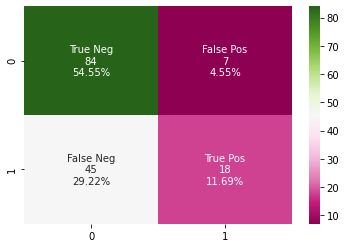

In [37]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap="PiYG")

### d)

In [20]:
print("\n[+] classification report\n")
print(classification_report(y_test, y_pred))


[+] classification report

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        91
           1       0.72      0.29      0.41        63

    accuracy                           0.66       154
   macro avg       0.69      0.60      0.59       154
weighted avg       0.68      0.66      0.62       154

